<a href="https://colab.research.google.com/github/intansalqiah/folium_project_n3ts/blob/main/Intan_Salqiah_X6_Semarang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Tugas Project

1. import folium, pandas, geopandas, dan drive.
2. load data shapefile, pilih kota/kabupaten yang akan dianalisis
3. load data csv dan proses merge/join data
4. load peta choropleth

In [8]:
# Import Library

import folium
import pandas as pd
import geopandas as gpd
from google.colab import drive

Pilih nama kota / kabupaten kalian. jika tidak muncul pastikan namanya sesuai dengan nama di link berikut :
https://geoservices.big.go.id/portal/apps/webappviewer/index.html?id=cb58db080712468cb4bfd408dbde3d70

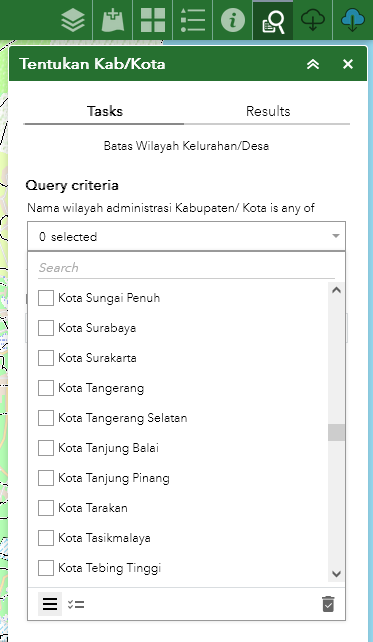

In [9]:
# Read Data Shapefile

drive.mount('/content/drive')

# Shapefile Admin Indonesia (tidak usah diubah2) Warning! File besar 1.4gb
indonesia_admin = gpd.read_file('/content/drive/MyDrive/ADMIN_INDO/ADMINISTRASI_AR_DESAKEL_10K.shp')

# Pilih Kota/Kabupaten yang ingin ditampilkan, contoh 'Kota Tangerang Selatan'
aoi_admin = indonesia_admin[indonesia_admin['WADMKK'] == 'Kota Semarang']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# CSV file path
csv_path = '/content/drive/MyDrive/kk_semarang_xx.csv'

# Read shapefile
admin_gdf = aoi_admin

# Read CSV data
csv_data = pd.read_csv(csv_path)

print(csv_data.head())
print(admin_gdf.head())
# Convert column names to lowercase
csv_data['Kelurahan'] = csv_data['Kelurahan'].str.lower().str.replace(' ', '')
admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.lower().str.replace(' ', '')
#csv_data['Jumlah_KK'] = csv_data['Jumlah_KK'].astype(str).str.replace('.', '')
#csv_data['Jumlah_KK'] = pd.to_numeric(csv_data['Jumlah_KK'])

# Fix typo to merge properly
#admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.replace('pondokjagungt', 'pondokjagung')
#csv_data['Kelurahan'] = csv_data['Kelurahan'].str.replace('perigibaru', 'parigibaru')

# Merge data
merged_data = pd.merge(admin_gdf, csv_data, left_on='NAMOBJ', right_on='Kelurahan', how='left')

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged_data, geometry=merged_data.geometry)

print(merged_gdf.head())
# Now you can use merged_gdf for further analysis and visualization

          Kelurahan  Jumlah_KK  tahun
0       Kembangarum       6618   2023
1          Manyaran       5820   2023
2  Ngemplaksimongan       4395   2023
3          Bongsari       4429   2023
4     Bojongsalaman       2962   2023
      OBJECTID           NAMOBJ       FCODE  \
2277    2278.0      Bambankerep  BA03070040   
2302    2303.0  Bangetayu Kulon  BA03070040   
2303    2304.0  Bangetayu Wetan  BA03070040   
2308    2309.0      Bangunharjo  BA03070040   
2364    2365.0       Banyumanik  BA03070040   

                                               REMARK  \
2277  Hasil Pelacakan Batas Kelurahan Tahun 2016-2019   
2302  Hasil Pelacakan Batas Kelurahan Tahun 2016-2019   
2303  Hasil Pelacakan Batas Kelurahan Tahun 2016-2019   
2308  Hasil Pelacakan Batas Kelurahan Tahun 2016-2019   
2364                                             None   

                                          METADATA     SRS_ID KDBBPS KDCBPS  \
2277  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   Non

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [11]:
# Create a base map
m = folium.Map(location=[-7.02,110.3], zoom_start=11)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=["Kelurahan", "Jumlah_KK"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah_KK"
).add_to(m)

jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='Jumlah_KK',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKD','Jumlah_KK'],
        aliases=['Kelurahan','Jumlah_KK']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

In [15]:
# Create a base map
m = folium.Map(location=[-7.02,110.3], zoom_start=13)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name="Jumlah KK Kelurahan Semarang",
    data=merged_gdf,
    columns=["Kelurahan", "Jumlah_KK"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah_KK"
).add_to(m)

# Create/import data sma
data_sma = pd.read_csv('/content/drive/MyDrive/sman_semarang.csv')

data_sma['geometry'] = gpd.GeoSeries.from_wkt(data_sma['WKT'])

# Extract latitude and longitude from Point geometries
data_sma['latitude'] = data_sma['geometry'].apply(lambda x: x.y)
data_sma['longitude'] = data_sma['geometry'].apply(lambda x: x.x)

# Add markers to the map
# Create a marker layer
marker_layer = folium.FeatureGroup(name="SMAN Semarang")

# Add markers to the layer
for i in range(0, len(data_sma)):
    folium.Marker([data_sma.iloc[i]['latitude'], data_sma.iloc[i]['longitude']], popup=data_sma.iloc[i]['nama']).add_to(marker_layer)

m.add_child(marker_layer)

# Add Jumlah_KK layer map
jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='Jumlah_KK',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['NAMOBJ','Jumlah_KK'],
        aliases=['Kelurahan','Jumlah_KK']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

Analysis Question:
Kelurahan mana yang memiliki jumlah KK dengan kelas tertinggi (Merah Tua)?

Jawab: muktiharjokidul, sendangmulyo

Kelurahan apa saja yang tidak terdapat Sekolah Negeri?

Jawab: 1. tambakharjo
2. ⁠tugurejo
3. ⁠karanganyar
4. ⁠mangkangkulon
5. ⁠gondoriyo
6. ⁠podorejo
7. ⁠wonosari
8. ⁠tambakaji
9. ⁠bringin
10. ⁠wonoplumbon
11. ⁠ngadirgo
12. ⁠wates
13. ⁠ngaliyan
14. ⁠jerakah
15. ⁠purwoyoso
16. ⁠kedungpane
17. ⁠pesantren
18. ⁠wonoplumbon
19. ⁠jatisari
20. ⁠cangkiran
21. ⁠bubakan
22. ⁠mijen
23. ⁠tambangsn
24. ⁠kandri
25. ⁠sadeng
26. ⁠ngijo
27. ⁠mangunsari
28. ⁠pakintelan
29. ⁠sumurrejo
30. ⁠jabungan
31. ⁠gedawang
32. ⁠patemon
33. ⁠sekaran
34. ⁠karangrejo
35. ⁠mangunharjo
36. ⁠rowosari
37. ⁠meteseh
38. ⁠ngesrep
39. ⁠tlogomulyo
40. ⁠banjardowo
41. ⁠kudu
42. ⁠penggaronlor
43. ⁠tanjungmas
44. ⁠rejomulyo
45. ⁠rejosari
46. ⁠bandarharjo
47. ⁠siwalan
48. ⁠karangtempel
49. ⁠pedurunganlor

